In [45]:
import numpy as np
import matplotlib.pyplot as plt
import simpleaudio as sa
import IPython.display as ipd
import soundfile as sf
import sounddevice as sd

In [148]:
def soundwave(length_of_sample,frequency,sample_rate):
    #Define variables
    #sample rate F_s
    Fs = sample_rate 
    #sample period
    T = 1 /Fs
    #length of sampling (seconds)
    t = length_of_sample
    #resolution of signal
    N = Fs*t

    #Define signal information
    #note frequency
    f = frequency
    #angular frequency
    om = 2*np.pi*f 

    #time vector
    tv = np.arange(N) * T
    y = np.sin(om*tv)
    
    return tv, y

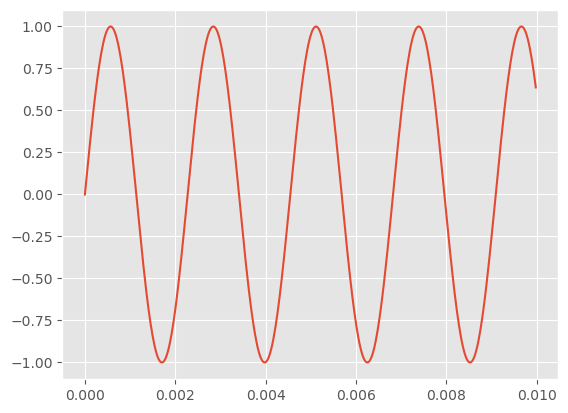

In [149]:
# plt.style.use('ggplot')
freq = 440 #A_4 on a piano
tv,note = soundwave(0.01,freq,44100)
plt.plot(tv,note)
plt.show()

In [78]:
audio = note.astype(np.int16) 
sf.write(r'C:\Users\David\Documents\Python Scripts\test.wav',note,44100,'PCM_24')
sd.play(note,44100)

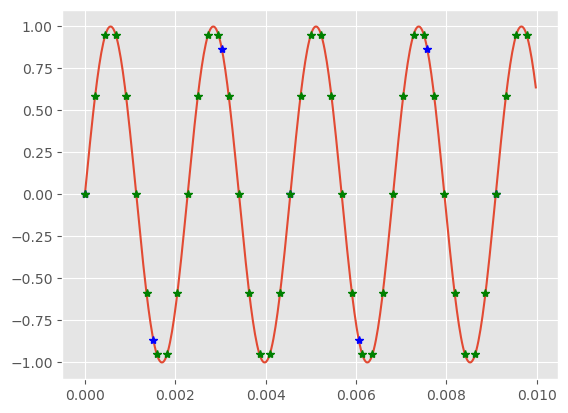

In [168]:
freq = 440#A_4
sec = 0.01 #make it short and sweet :)
tv,note = soundwave(sec,freq,44100)
plt.plot(tv,note)

#We want to show that with a sampling rate = 2*freq we can properly sample the waveform
tv,note = soundwave(sec,freq,1.5*freq)
plt.plot(tv,note,'b*')

tv,note = soundwave(sec,freq,10*freq)
plt.plot(tv,note,'g*')

plt.show()